In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

In [88]:
GOES_path = '/Users/anna.jungbluth/Desktop/ITI-Spectral-Response/GOES-R_ABI_PFM_SRF_CWG_v3/'
TERRA_path = '/Users/anna.jungbluth/Desktop/ITI-Spectral-Response/TERRA_MODIS_PFM_IB_OOB_RSR_merged.xls'

In [91]:
GOES_response_files = glob.glob(GOES_path+'/*')
TERRA_response_file = glob.glob(TERRA_path)

In [113]:
columns = []
for x in np.arange(1, 37):
    columns.append(f'Band {x} - Wvln(mm)')
    columns.append(f'Band {x} - RSR')

In [124]:
MODIS_df = pd.read_excel(TERRA_response_file[0], skiprows=[0,1], header=None)
MODIS_df.columns = columns

/var/folders/qf/2p1yg9xd5yg1vlvp4j7bv8jmxr_r7s/T/ipykernel_41861/89103494.py:2: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(hspace=-1)  # adjust space between axes


Text(0, 0.5, 'Spectral Response')

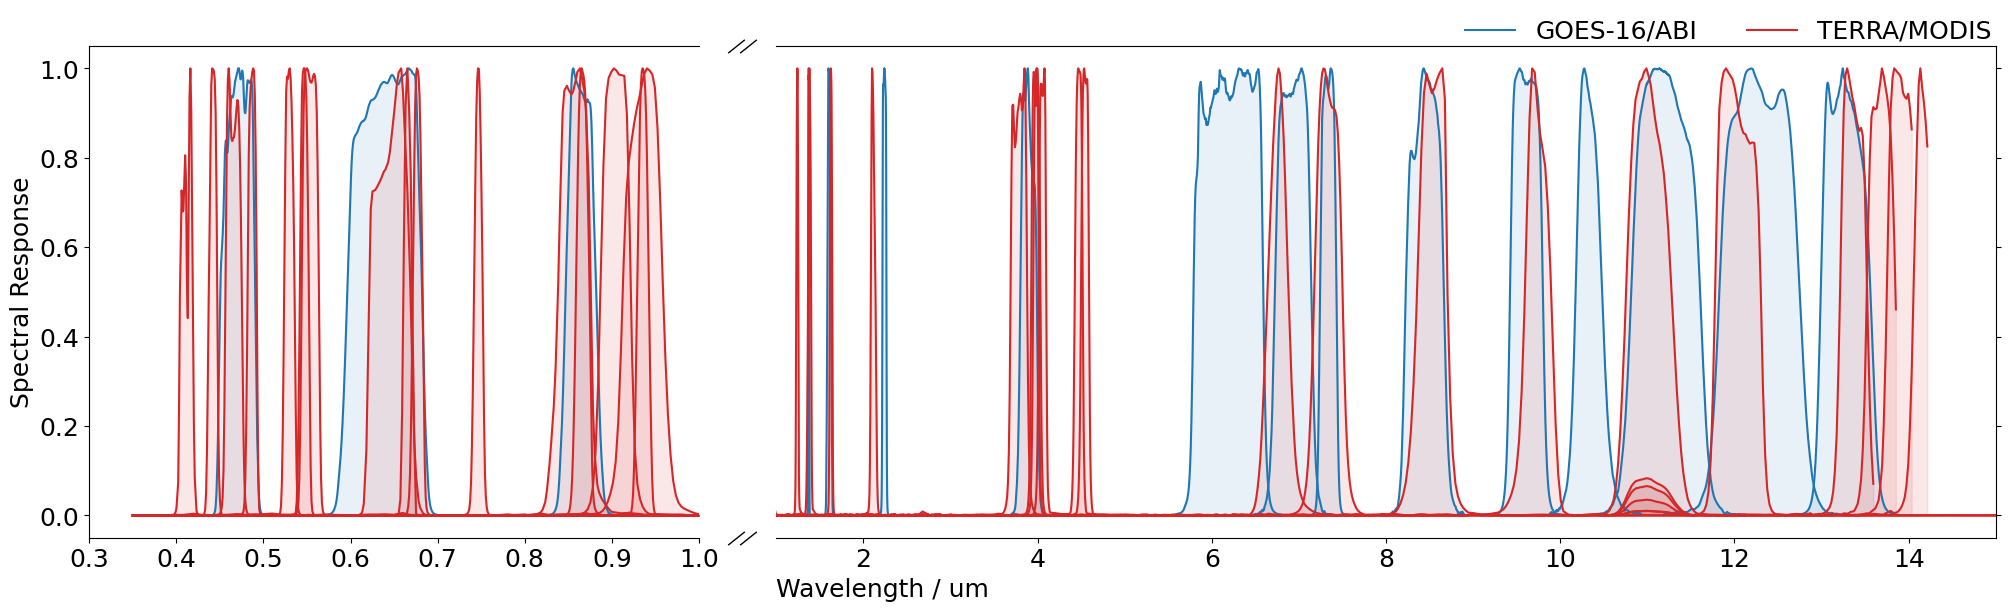

In [230]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(20, 6), width_ratios=[2, 4], constrained_layout=True)
fig.subplots_adjust(hspace=-1)  # adjust space between axes

for ch in np.arange(1, 17):
    filename = glob.glob(GOES_path+f'*ch{ch}.*')[0]
    GOES_df = pd.read_csv(filename, header=None, delim_whitespace=True, skiprows=[0,1])
    GOES_df.columns = ['wvl [micron]',  'wavenum [cm-1]',  'relative SRF']
    ax1.plot(GOES_df['wvl [micron]'], GOES_df['relative SRF'], color='tab:blue')
    if ch == 1:
        ax2.plot(GOES_df['wvl [micron]'], GOES_df['relative SRF'], color='tab:blue', label='GOES-16/ABI')
    ax2.plot(GOES_df['wvl [micron]'], GOES_df['relative SRF'], color='tab:blue')
    ax1.fill_between(GOES_df['wvl [micron]'], GOES_df['relative SRF'], color='tab:blue', alpha=.1)
    ax2.fill_between(GOES_df['wvl [micron]'], GOES_df['relative SRF'], color='tab:blue', alpha=.1)
    
for ch in np.arange(1, 37):
    wvl = MODIS_df[f'Band {ch} - Wvln(mm)']
    RSR = MODIS_df[f'Band {ch} - RSR']
    ax1.plot(wvl, RSR, color = 'tab:red')
    if ch == 1:
        ax2.plot(wvl, RSR, color = 'tab:red', label = 'TERRA/MODIS')
    ax2.plot(wvl, RSR, color = 'tab:red')
    ax1.fill_between(wvl, RSR, 0, color='tab:red', alpha=.1)
    ax2.fill_between(wvl, RSR, 0, color='tab:red', alpha=.1)
    
ax1.set_xlim(0.3, 1)  # outliers only
ax2.set_xlim(1, 15)  # most of the data

ax1.spines.right.set_visible(False)
ax2.spines.left.set_visible(False)

ax1.tick_params(labelright=False)
ax2.tick_params(labelleft=False)  
ax2.yaxis.tick_right()

d = .8  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([1.06, 1.08], [0, 0], transform=ax1.transAxes, **kwargs)
ax1.plot([1.06, 1.08], [1, 1], transform=ax1.transAxes, **kwargs)

ax1.tick_params(axis='both', which='major', labelsize=18)
ax2.tick_params(axis='both', which='major', labelsize=18)

plt.legend(fontsize=18, bbox_to_anchor=[1.015, 1.1], ncols=2, frameon=False)
plt.xlabel('Wavelength / um', fontsize = 18, loc ='left')
ax1.set_ylabel('Spectral Response', fontsize = 18)